<a href="https://colab.research.google.com/github/tanujpokhriyal2005/Machine-Learning/blob/main/PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20)
df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])
df1['target'] = 0


df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)



In [5]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [6]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [7]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [8]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [9]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [10]:
eigen_values


array([1.3536065 , 0.94557084, 0.77774573])

In [11]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

Populating the interactive namespace from numpy and matplotlib


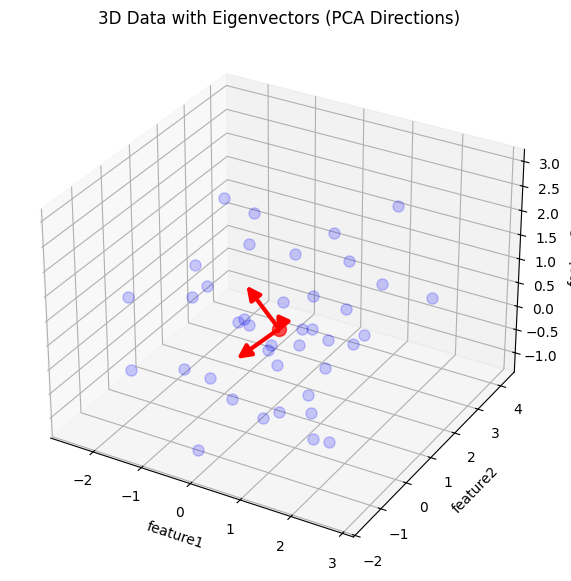

In [19]:
%pylab inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

# --------------------------
# Creating your dataset again
# --------------------------
np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.eye(3)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat1, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

# -----------------------------------
# Compute eigenvectors for PCA arrows
# -----------------------------------
X = df[['feature1','feature2','feature3']].values
X_centered = X - X.mean(axis=0)

cov_mat = np.cov(X_centered.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

# -----------------------------------
# Final working Arrow3D class
# -----------------------------------
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        proj = ax.get_proj()
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        proj = ax.get_proj()
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)


# --------------------------
# Plotting
# --------------------------
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.plot(df['feature1'], df['feature2'], df['feature3'],
        'o', markersize=8, color='blue', alpha=0.2)

# Plot mean
mean_x, mean_y, mean_z = X.mean(axis=0)
ax.plot([mean_x], [mean_y], [mean_z],
        'o', markersize=10, color='red', alpha=0.7)

# Plot eigenvectors as arrows from the mean
for v in eigen_vectors.T:
    a = Arrow3D([mean_x, mean_x + v[0]],
                [mean_y, mean_y + v[1]],
                [mean_z, mean_z + v[2]],
                mutation_scale=20,
                lw=3,
                arrowstyle="-|>",
                color="red")
    ax.add_artist(a)

ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature3")
plt.title("3D Data with Eigenvectors (PCA Directions)")
plt.show()


In [20]:
pc = eigen_vectors[0:2]
pc

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906]])

In [21]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.502355,1.303153,1
1,0.778695,-1.132295,0
2,-0.569075,-0.164066,1
3,-1.083293,-0.494640,1
4,1.660680,0.843708,1


In [22]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()